# Análisis de la distribución de opiniones de películas 

Para conocer mejor la distribución gaussiana, vamos a dejar a un lado las notas obtenidas en el examen y vamos a concentrarnos en las críticas de películas.

Estas son las opiniones (calificadas de 0 a 5) obtenidas por una película, donde 5 es la mejor nota que puede obtener la película: las famosas 5 estrellas que podemos encontrar en todos los sitios de críticas de cine.

Realizaremos los siguientes cálculos:

1. Calcular la media.
2. Calcular la varianza y desviación típica.
3. Calcular el porcentaje de observaciones dentro de una desviación típica de la media.
4. Visualizar los datos con matplotlib.pyplot.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_datos = pd.DataFrame({'Opinión (Xi)': [5, 4, 3, 2, 1, 0], 'Cantidad de votantes (ni)': [40, 99, 145, 133, 96, 40]})
df_datos


,Opinión (Xi),Cantidad de votantes (ni)
0,5,40
1,4,99
2,3,145
3,2,133
4,1,96
5,0,40


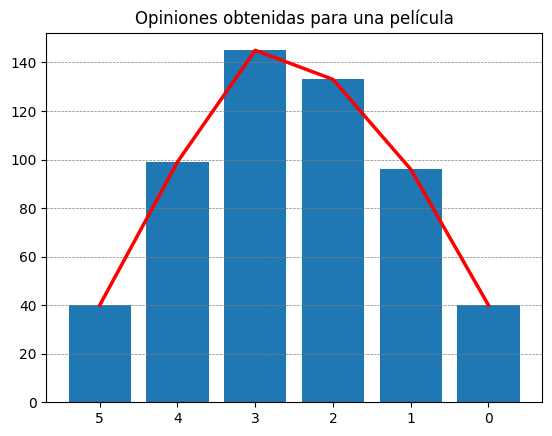

In [5]:
plt.bar(df_datos['Opinión (Xi)'], df_datos['Cantidad de votantes (ni)'])

plt.plot(df_datos['Opinión (Xi)'], df_datos['Cantidad de votantes (ni)'], color='red', linewidth=2.5)

plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

plt.gca().invert_xaxis()

plt.title('Opiniones obtenidas para una película')

plt.show()

### Cálculo de la media

In [12]:
df_calculos = df_datos.copy()

df_calculos['Producto_Xi_ni'] = df_calculos['Opinión (Xi)'] * df_calculos['Cantidad de votantes (ni)']

df_calculos.head()


,Opinión (Xi),Cantidad de votantes (ni),Producto_Xi_ni
0,5,40,200
1,4,99,396
2,3,145,435
3,2,133,266
4,1,96,96


In [10]:
total_multiplicaciones = (df_datos['Opinión (Xi)'] * df_datos['Cantidad de votantes (ni)']).sum()

total_votantes = df_datos['Cantidad de votantes (ni)'].sum()

promedio_ponderado = total_multiplicaciones / total_votantes

print(f'El promedio ponderado es de {round(promedio_ponderado, 2)}.')

El promedio ponderado es de 2.52.


### Cálculo de la varianza

In [13]:
df_calculos['Varianza'] = df_calculos['Cantidad de votantes (ni)'] * ((df_calculos['Opinión (Xi)'] - promedio_ponderado) ** 2)

df_calculos['Varianza'] = df_calculos['Varianza'].round(3)

df_calculos.head()


,Opinión (Xi),Cantidad de votantes (ni),Producto_Xi_ni,Varianza
0,5,40,200,246.217
1,4,99,396,217.146
2,3,145,435,33.549
3,2,133,266,35.823
4,1,96,96,221.503


In [14]:
total_varianza = df_calculos['Varianza'].sum()

varianza_calculada = total_varianza / total_votantes

print(f'La varianza calculada es de {round(varianza_calculada, 2)}.')


La varianza calculada es de 1.82.


### Cálculo desviación típica

In [17]:

df_calculos['Varianza'] = df_calculos['Cantidad de votantes (ni)'] * ((df_calculos['Opinión (Xi)'] - promedio_ponderado) ** 2)
df_calculos['Varianza'] = df_calculos['Varianza'].round(3)

df_calculos['Desviacion_tipica'] = np.sqrt(df_calculos['Varianza'])

df_calculos.head()


,Opinión (Xi),Cantidad de votantes (ni),Producto_Xi_ni,Varianza,Desviacion_Estandar,Desviacion_tipica
0,5,40,200,246.217,15.691303,15.691303
1,4,99,396,217.146,14.735875,14.735875
2,3,145,435,33.549,5.792150,5.792150
3,2,133,266,35.823,5.985232,5.985232
4,1,96,96,221.503,14.882977,14.882977


In [18]:
std_dev = np.sqrt(varianza_calculada)

print(f'La desviación estándar calculada es de {round(std_dev, 2)}.')


La desviación estándar calculada es de 1.35.


In [20]:
confianza = 0.68

intervalo_inferior = round(promedio_ponderado - std_dev, 2)
intervalo_superior = round(promedio_ponderado + std_dev, 2)

observaciones_rango = df_calculos[(df_calculos['Opinión (Xi)'] >= intervalo_inferior) & (df_calculos['Opinión (Xi)'] <= intervalo_superior)].copy()

print('------------------------- RESULTADOS -------------------------')
print(f'El intervalo de confianza del {confianza * 100}% está entre: {intervalo_inferior} y {intervalo_superior}.')
print(f'Número total de observaciones: {total_votantes}.')
print(f'Número de observaciones entre {intervalo_inferior} y {intervalo_superior}: {observaciones_rango["Cantidad de votantes (ni)"].sum()}.')
print(f'Porcentaje de observaciones dentro del intervalo: {round(observaciones_rango["Cantidad de votantes (ni)"].sum() / total_votantes * 100, 2)}%.')

------------------------- RESULTADOS -------------------------
El intervalo de confianza del 68.0% está entre: 1.17 y 3.87.
Número total de observaciones: 553.
Número de observaciones entre 1.17 y 3.87: 278.
Porcentaje de observaciones dentro del intervalo: 50.27%.


# Histogramas

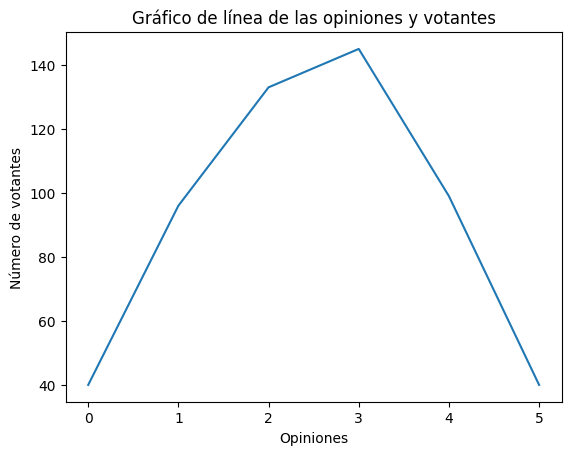

In [21]:
fig, ax1 = plt.subplots()
ax1.plot(df_calculos['Opinión (Xi)'], df_calculos['Cantidad de votantes (ni)'])

ax1.set_title('Gráfico de línea de las opiniones y votantes')
ax1.set_xlabel('Opiniones')
ax1.set_ylabel('Número de votantes')

plt.show()
